# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [61]:
# Notebooks specific imports
from IPython import get_ipython
ipython = get_ipython()
#Expand notebook display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

# Basic useful imports
import re
import time
import yaml
from pprint import pprint
from pathlib import Path
import h5py

# Data manipulation
import numpy as np
from scipy.special import erf
from scipy.integrate import quad

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import (Circle, RegularPolygon, FancyArrowPatch, ArrowStyle)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullFormatter)
import matplotlib.colors as colors

# From AMSOS_analysis.py
import amsos_analysis as aa
from amsos_analysis.colormaps import register_cmaps

### Style settings

In [4]:
graph_sty = {
    "axes.titlesize": 20,
    "axes.labelsize": 24,
    "lines.linewidth": 2,
    "lines.markersize": 10,
    "xtick.labelsize": 24,
    "ytick.labelsize": 24,
    "font.size": 20,
    "font.sans-serif": 'Helvetica',
    "text.usetex": False,
    'mathtext.fontset': 'cm',
}
plt.style.use(graph_sty)
        

In [91]:
register_cmaps()
#plt.rcParams['image.cmap'] = 'emct8'
#plt.rcParams['image.cmap'] = 'warm'
plt.rcParams['image.cmap'] = 'YlOrRd'
#plt.rcParams['image.cmap'] = 'RdYlBu_r'

### Location

In [6]:
ws_path = Path('/home/alamson/DATA/Chromatin/')
mnt_path = Path.home() / 'projects/DATA/Chromatin/'
ceph_path = Path.home() / 'ceph/DATA/Chromatin/'

# Line analysis

## 200 line

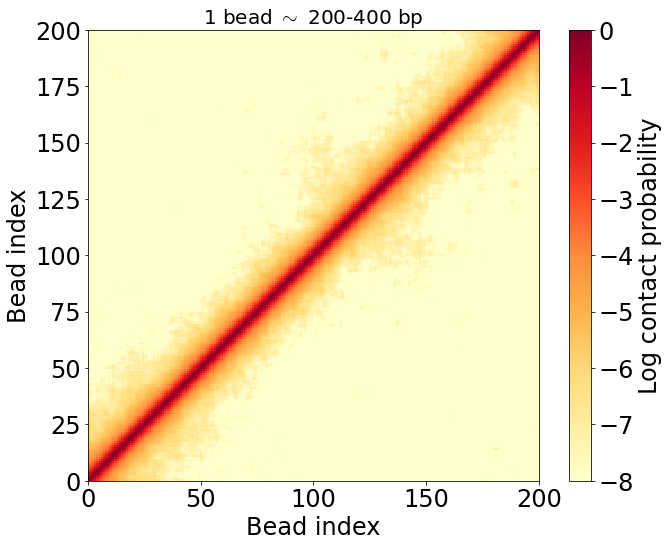

In [11]:
data_path = (ws_path /"21-09-13_aLchr1_line200")
ss_ind = 300
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-8)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1., vmin=-8)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)


#fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

## 200 line rigid 40

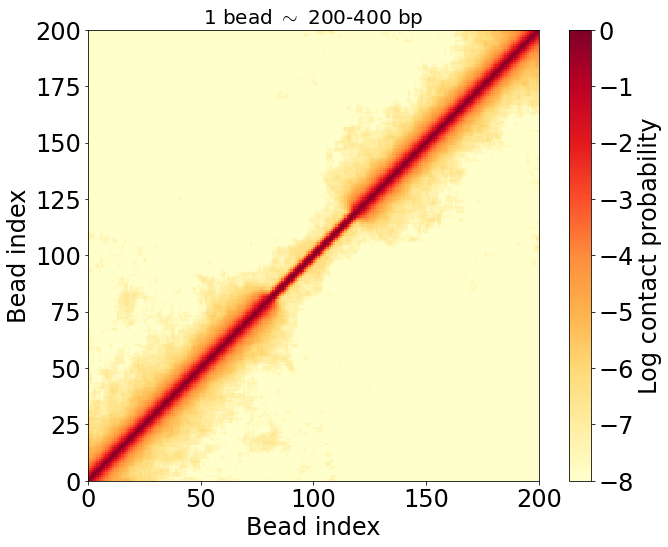

In [14]:
data_path = (ws_path /"21-09-09_aLchr1_line200_rigid40")
ss_ind = 300
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-8)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1., vmin=-8)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)


#fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

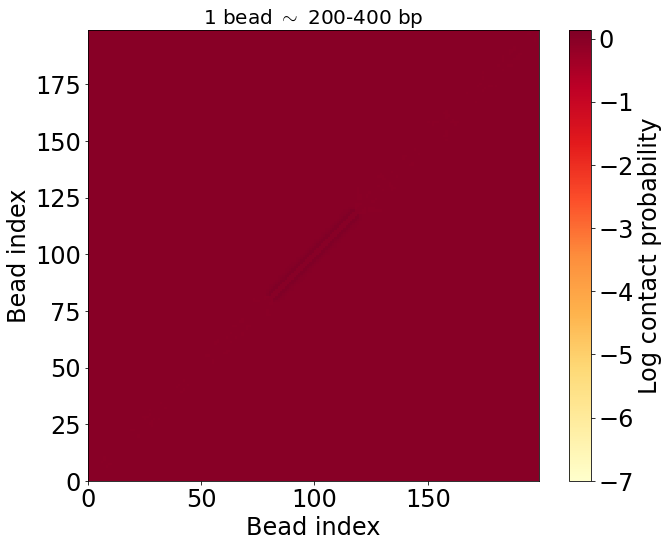

In [84]:
h5_baseline = next((ws_path /"21-09-13_aLchr1_line200").glob('*.h5'))
h5_comp = next((ws_path /"21-09-09_aLchr1_line200_rigid40").glob('*.h5'))

ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = -1

with h5py.File(h5_baseline, 'r+') as h5_data:
    sy_dat = h5_data['raw_data']['sylinders'][start_bead:end_bead,:,ss_ind:end_ind]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    sep_dist_mat = aa.get_sep_dist_mat(h5_data, ss_ind, bead_range=[start_bead,end_bead])
    contact_prob_bl = aa.gauss_weighted_contact(sep_dist_mat)


with h5py.File(h5_comp, 'r+') as h5_data:
    sep_dist_mat = aa.get_sep_dist_mat(h5_data, ss_ind, bead_range=[start_bead,end_bead])
    contact_prob_comp = aa.gauss_weighted_contact(sep_dist_mat)
    
log_avg_cmat_diff = (contact_prob_bl - contact_prob_comp).mean(axis=-1)
fig1, ax1 = aa.make_hic_plot(com_arr, np.ma.masked_invalid(log_avg_cmat_diff))

/tmp/ipykernel_3349132/819602865.py:1: RuntimeWarning: divide by zero encountered in log
  fig1, ax1 = aa.make_hic_plot(com_arr, np.ma.masked_invalid(np.log(log_avg_cmat_diff)), vmin=-7)
/tmp/ipykernel_3349132/819602865.py:1: RuntimeWarning: invalid value encountered in log
  fig1, ax1 = aa.make_hic_plot(com_arr, np.ma.masked_invalid(np.log(log_avg_cmat_diff)), vmin=-7)


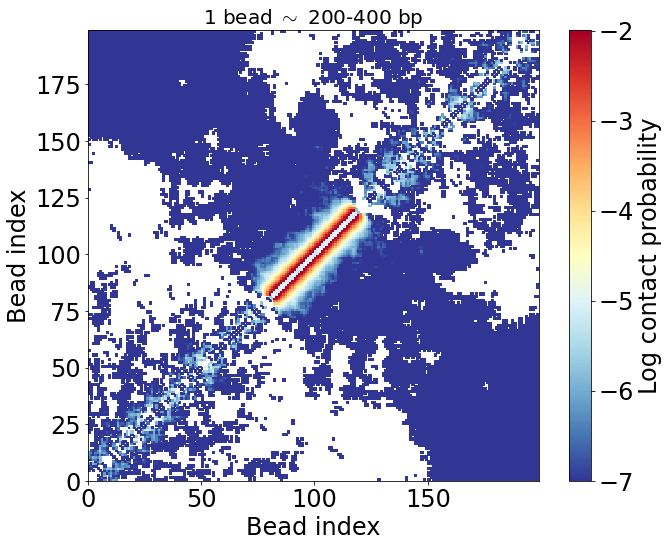

In [88]:
fig1, ax1 = aa.make_hic_plot(com_arr, np.ma.masked_invalid(np.log(log_avg_cmat_diff)), vmin=-7)

/tmp/ipykernel_3349132/547667958.py:1: RuntimeWarning: divide by zero encountered in true_divide
  fig1, ax1 = aa.make_hic_plot(com_arr,  np.ma.masked_invalid(np.log((contact_prob_comp/contact_prob_bl).mean(axis=-1)-1)), vmax=50,)
/tmp/ipykernel_3349132/547667958.py:1: RuntimeWarning: overflow encountered in true_divide
  fig1, ax1 = aa.make_hic_plot(com_arr,  np.ma.masked_invalid(np.log((contact_prob_comp/contact_prob_bl).mean(axis=-1)-1)), vmax=50,)
/tmp/ipykernel_3349132/547667958.py:1: RuntimeWarning: invalid value encountered in true_divide
  fig1, ax1 = aa.make_hic_plot(com_arr,  np.ma.masked_invalid(np.log((contact_prob_comp/contact_prob_bl).mean(axis=-1)-1)), vmax=50,)
/tmp/ipykernel_3349132/547667958.py:1: RuntimeWarning: divide by zero encountered in log
  fig1, ax1 = aa.make_hic_plot(com_arr,  np.ma.masked_invalid(np.log((contact_prob_comp/contact_prob_bl).mean(axis=-1)-1)), vmax=50,)
/tmp/ipykernel_3349132/547667958.py:1: RuntimeWarning: invalid value encountered in log
  f

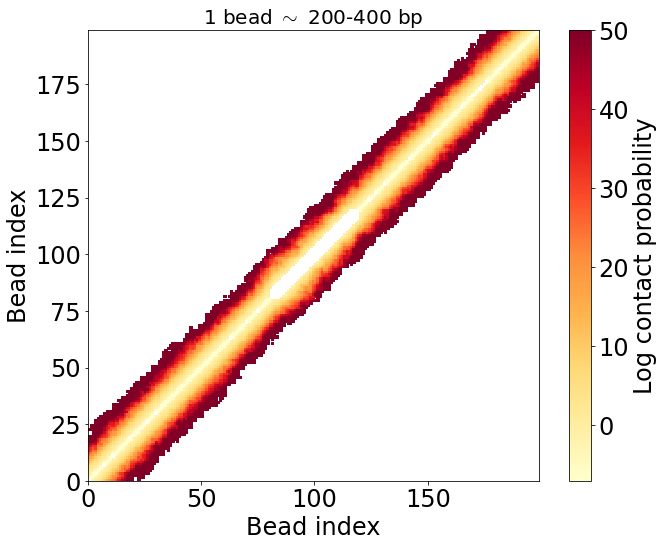

In [83]:
fig1, ax1 = aa.make_hic_plot(com_arr,  np.ma.masked_invalid(np.log((contact_prob_comp/contact_prob_bl).mean(axis=-1)-1)), vmax=50,)

## 21-10-08_aLchr1_line200_steric_rigid40

2401


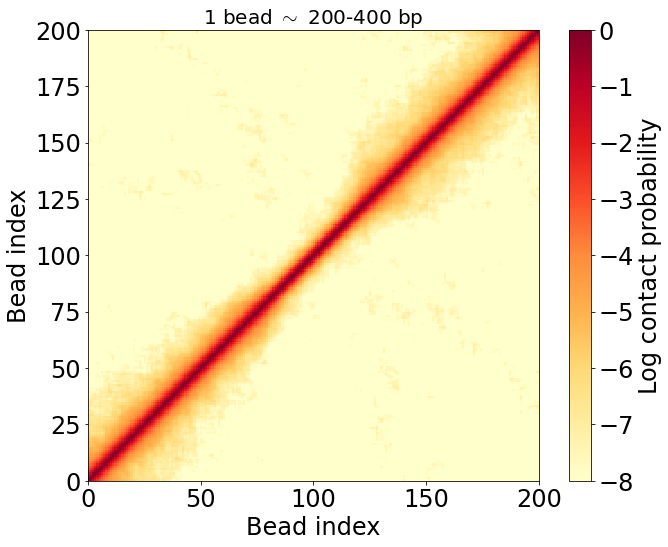

In [15]:
data_path = (ws_path /"21-10-08_aLchr1_line200_steric_rigid40")
ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = 200
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    print(time_arr.size)
    sy_dat = h5_data['raw_data']['sylinders'][start_bead:end_bead,:,ss_ind:end_ind]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-8)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1., vmin=-8)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)


#fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

## 21-10-08_aLchr1_line200_steric_rigid40_2xRad

2401


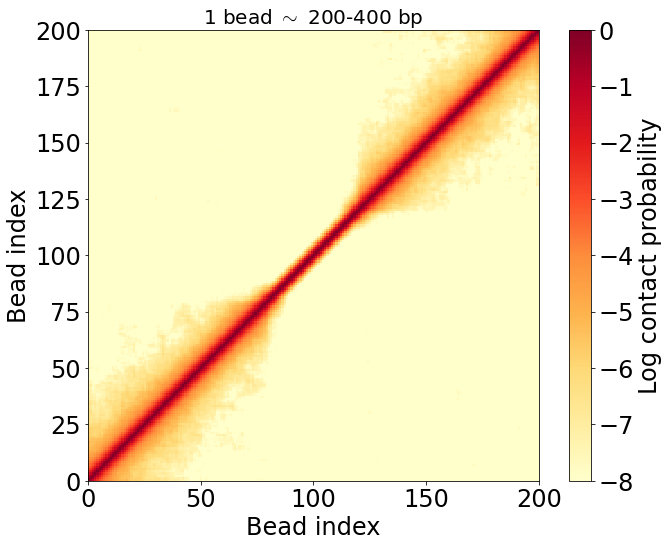

In [16]:
data_path = (ws_path /"21-10-08_aLchr1_line200_steric_rigid40_2xRad")
ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = 200
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    print(time_arr.size)
    sy_dat = h5_data['raw_data']['sylinders'][start_bead:end_bead,:,ss_ind:end_ind]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-8)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1., vmin=-8)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)


#fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

## 21-10-08_aLchr1_line200_steric_rigid100

2401


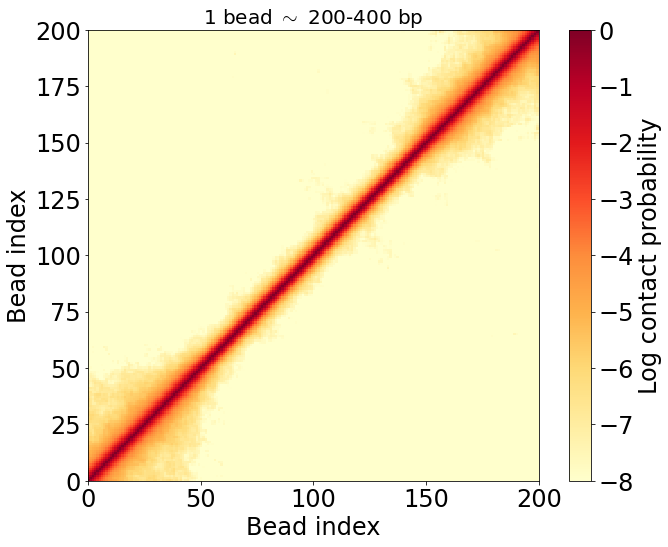

In [17]:
data_path = (ws_path /"21-10-08_aLchr1_line200_steric_rigid100")
ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = 200
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    print(time_arr.size)
    sy_dat = h5_data['raw_data']['sylinders'][start_bead:end_bead,:,ss_ind:end_ind]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-8)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1., vmin=-8)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)


#fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

## 21-10-08_aLchr1_line200_steric_2xrigid40

2401


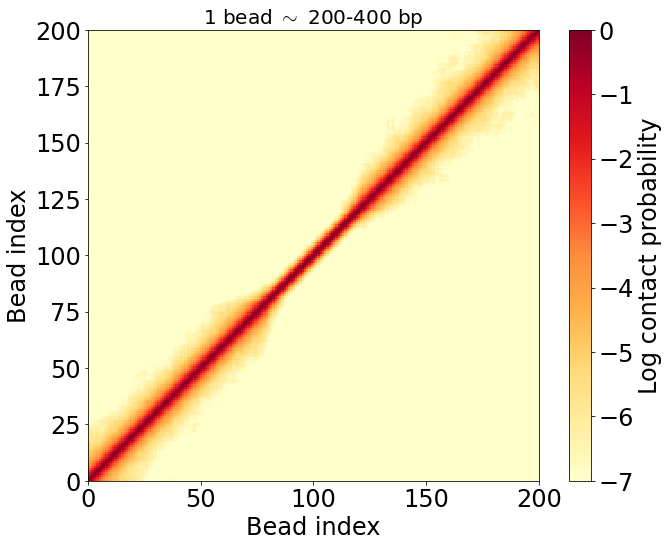

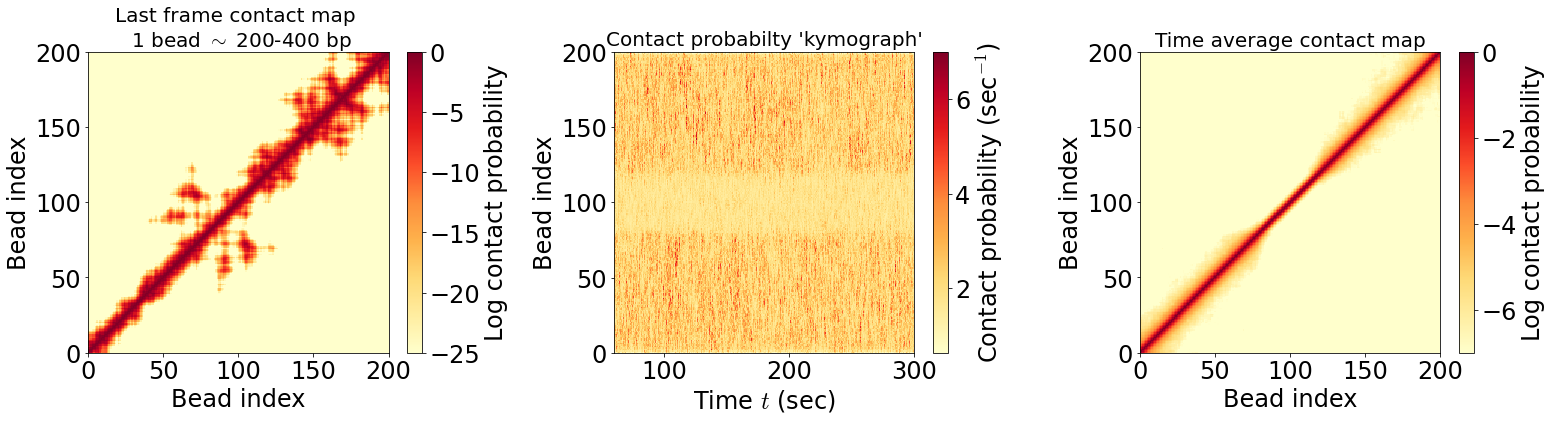

In [107]:
data_path = (ws_path /"21-10-08_aLchr1_line200_steric_2xrigid40")
ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = 200
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    print(time_arr.size)
    sy_dat = h5_data['raw_data']['sylinders'][start_bead:end_bead,:,ss_ind:end_ind]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]
    sep_dist_mat = aa.get_sep_dist_mat(h5_data, ss_ind, bead_range=[start_bead,end_bead])


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1., vmin=-7)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)

contact_mat = aa.gauss_weighted_contact(sep_dist_mat)
fig2, axarr2, contact_kymo = aa.make_summed_contact_kymo_graph(contact_mat[:,:,:end_ind], time_arr, vmin=-25, vmax=7, avg_contact_map=log_contact_avg_mat)

## 21-10-12_aLchr1_line200_steric_rigid40_2xLink

2401


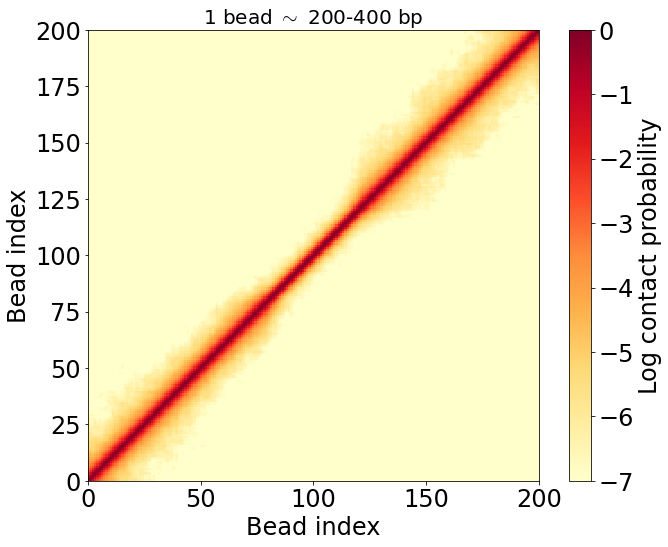

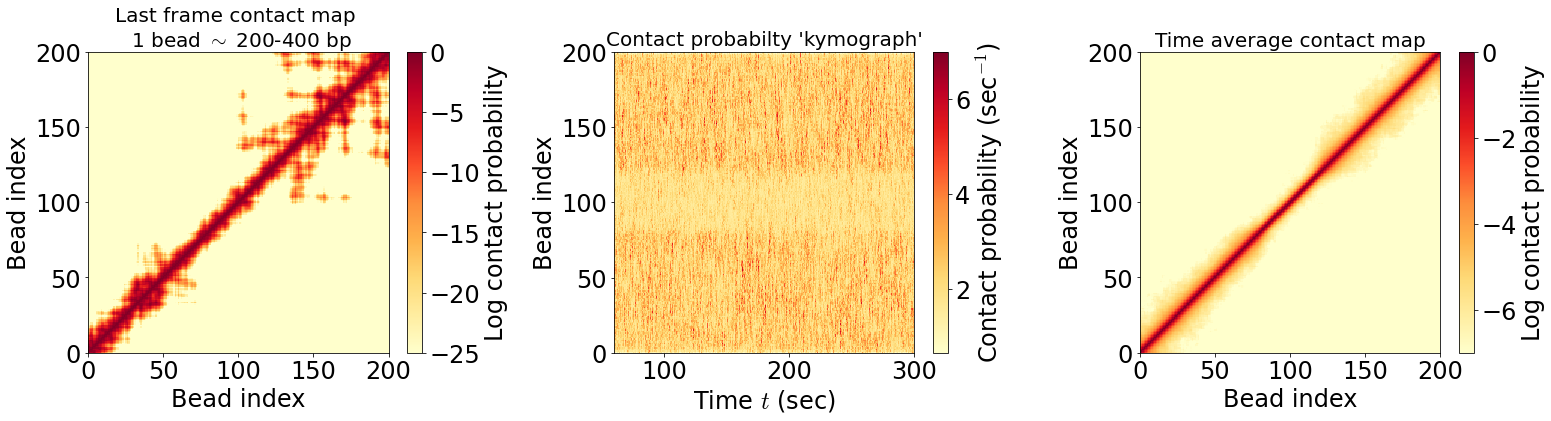

In [108]:
data_path = (ws_path /"21-10-12_aLchr1_line200_steric_rigid40_2xLink")
ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = 200
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    print(time_arr.size)
    sy_dat = h5_data['raw_data']['sylinders'][start_bead:end_bead,:,ss_ind:end_ind]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]
    sep_dist_mat = aa.get_sep_dist_mat(h5_data, ss_ind, bead_range=[start_bead,end_bead])


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1., vmin=-7)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)

contact_mat = aa.gauss_weighted_contact(sep_dist_mat)
fig2, axarr2, contact_kymo = aa.make_summed_contact_kymo_graph(contact_mat[:,:,:end_ind], time_arr, vmin=-25, vmax=7, avg_contact_map=log_contact_avg_mat)

## 21-10-12_aLchr1_line200_steric_2xrigid40_2xLink

2401


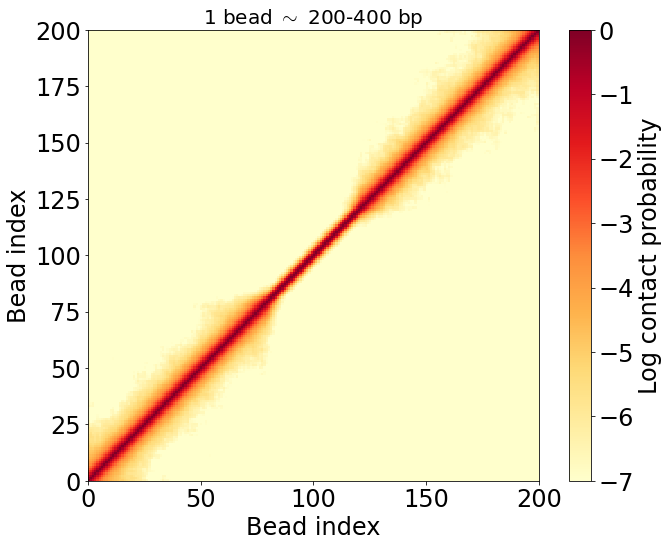

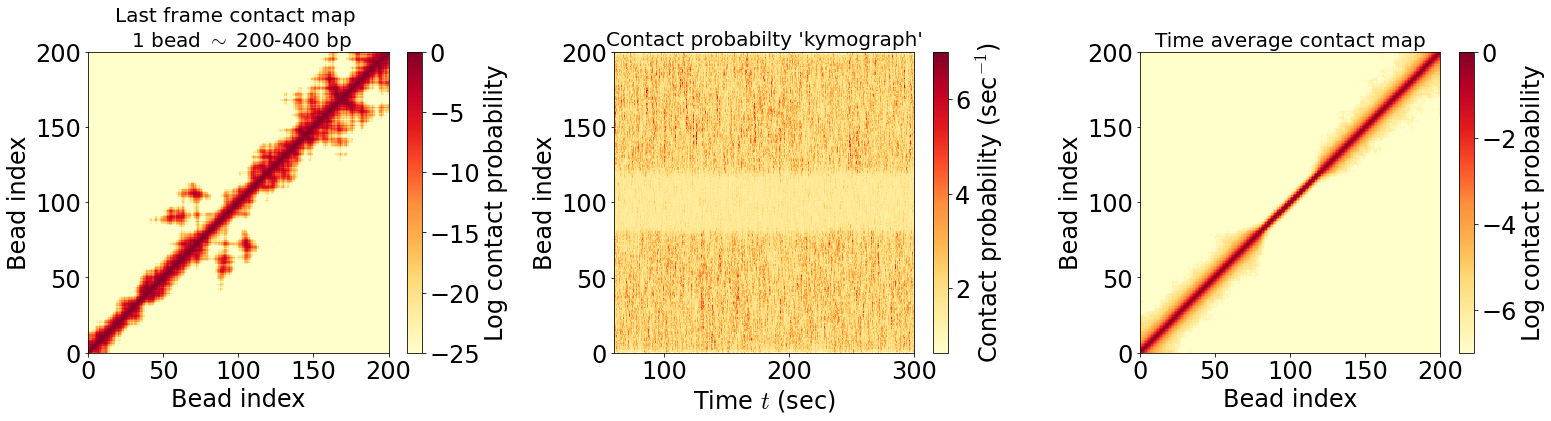

In [109]:
data_path = (ws_path /"21-10-12_aLchr1_line200_steric_2xrigid40_2xLink")
ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = 200
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    print(time_arr.size)
    sy_dat = h5_data['raw_data']['sylinders'][start_bead:end_bead,:,ss_ind:end_ind]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]
    sep_dist_mat = aa.get_sep_dist_mat(h5_data, ss_ind, bead_range=[start_bead,end_bead])


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1., vmin=-7)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)

contact_mat = aa.gauss_weighted_contact(sep_dist_mat)
fig2, axarr2, contact_kymo = aa.make_summed_contact_kymo_graph(contact_mat[:,:,:end_ind], time_arr, vmin=-25, vmax=7, avg_contact_map=log_contact_avg_mat)

## 21-10-12_aLchr1_line200_steric_rigid40_2xLink_2xRad

2401


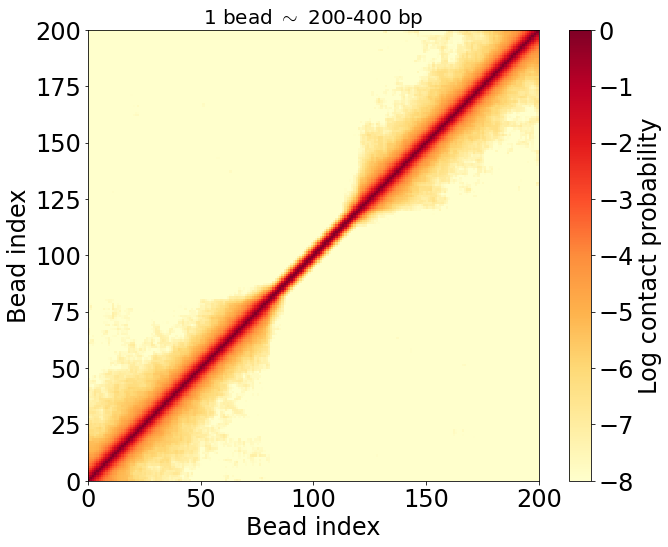

In [21]:
data_path = (ws_path /"21-10-12_aLchr1_line200_steric_rigid40_2xLink_2xRad")
ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = 200
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    print(time_arr.size)
    sy_dat = h5_data['raw_data']['sylinders'][start_bead:end_bead,:,ss_ind:end_ind]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-8)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1., vmin=-8)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)


#fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

# Looptail baselines

## 200 looptail

601


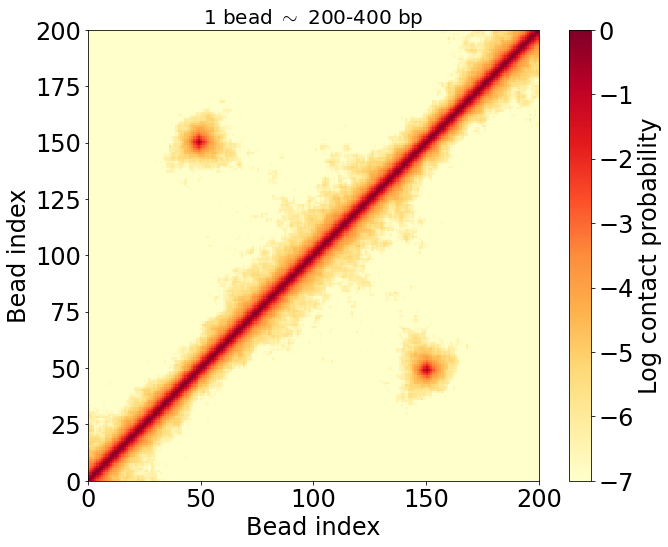

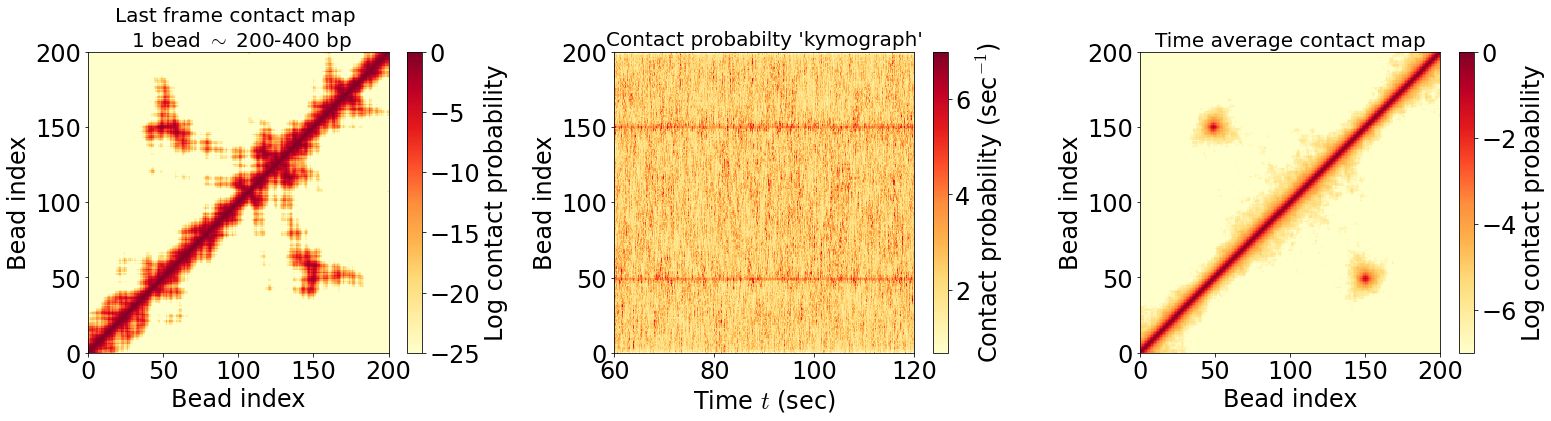

In [105]:
data_path = (ceph_path /"21-07-30_AMchr1_looptail200")
ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = 200
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    print(time_arr.size)
    sy_dat = h5_data['raw_data']['sylinders'][start_bead:end_bead,:,ss_ind:end_ind]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]
    sep_dist_mat = aa.get_sep_dist_mat(h5_data, ss_ind, bead_range=[start_bead,end_bead])


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1., vmin=-7)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)

contact_mat = aa.gauss_weighted_contact(sep_dist_mat)
fig2, axarr2, contact_kymo = aa.make_summed_contact_kymo_graph(contact_mat[:,:,:end_ind], time_arr, vmin=-25, vmax=7, avg_contact_map=log_contact_avg_mat)

## 200 looptail rigid 4links

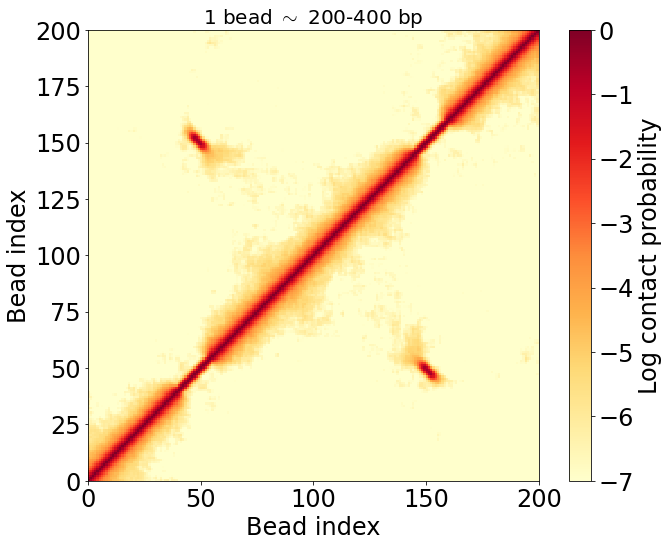

In [101]:
data_path = (ceph_path /"21-07-30_AMchr1_looptail200_rigid_4links")
ss_ind = 300
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:520,:,ss_ind:]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1., vmin=-7)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)
#fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

## 200 looptail rigid

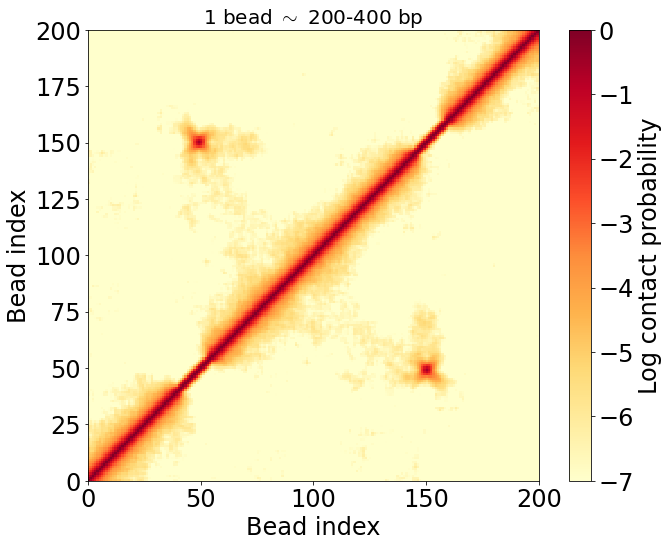

In [100]:
data_path = (ceph_path /"21-07-30_AMchr1_looptail200_rigid_center")
ss_ind = 300
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:520,:,ss_ind:]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1., vmin=-7)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)
#fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

## 200 looptail 4links

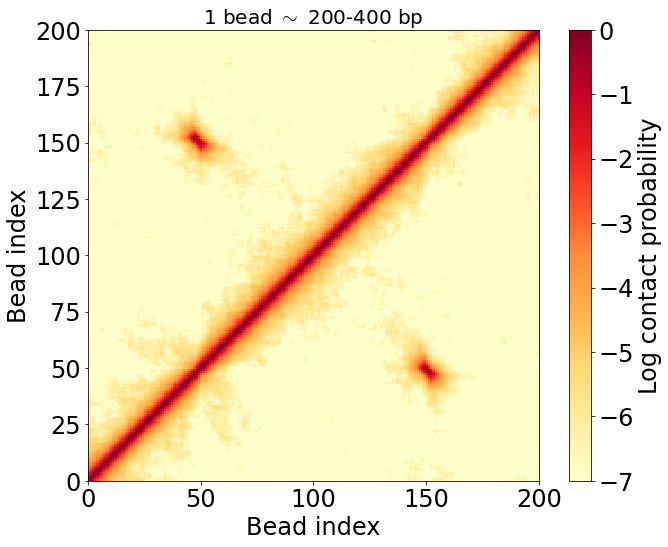

In [99]:
data_path = (ceph_path /"21-07-30_AMchr1_looptail200_4links")
ss_ind = 300
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:520,:,ss_ind:]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1.)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)
#fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

## 200 looptail 2links

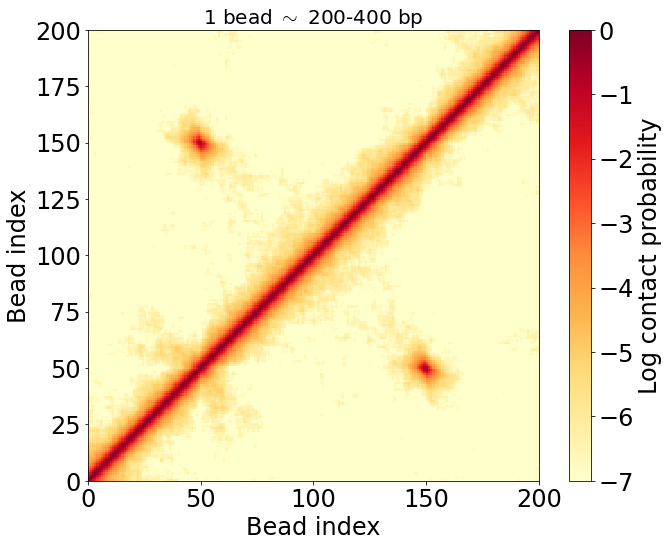

In [93]:
data_path = (ceph_path /"21-08-09_AMchr1_looptail200_2links")
ss_ind = 300
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:520,:,ss_ind:]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1.)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)

#fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

## 200 looptail rigid 2links

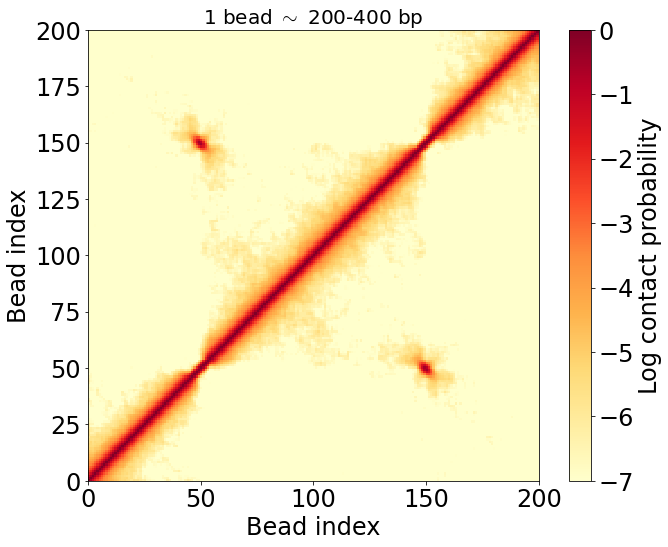

In [50]:
data_path = (ceph_path /"21-08-09_AMchr1_looptail200_rigid_2links")
ss_ind = 300
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:520,:,ss_ind:]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)
# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1.)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)

#fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

## 200 looptail 2Xrigid 2links

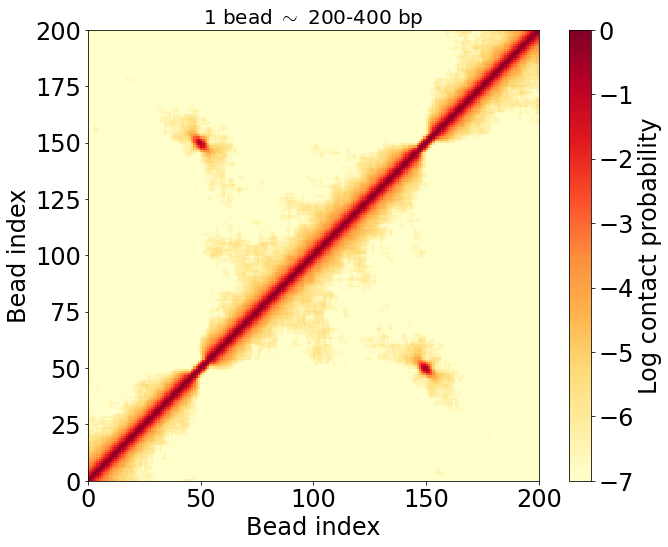

In [59]:
data_path = (ceph_path /"21-08-09_AMchr1_looptail200_2Xrigid_2links")
ss_ind = 300
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:520,:,ss_ind:]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)
# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1.)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)

#fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

## 200 looptail extend rigid 2links

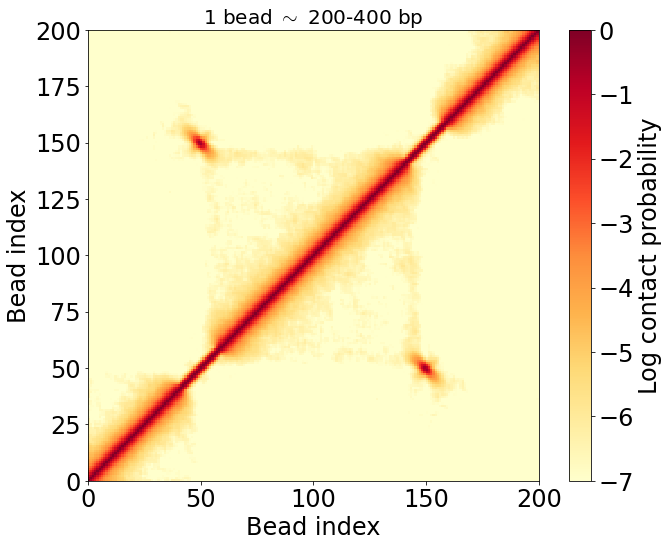

In [57]:
data_path = (ceph_path /"21-08-09_AMchr1_looptail200_extrigid_2links")
ss_ind = 600
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:520,:,ss_ind:]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1.)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)

#fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

## 200 back-looptail 

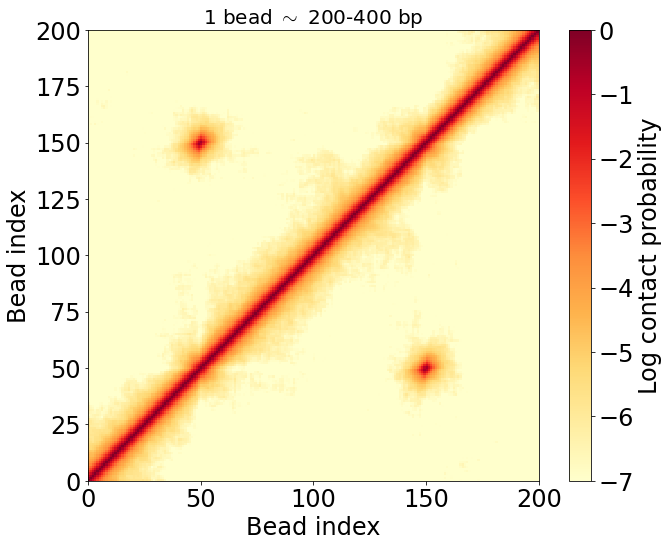

In [58]:
data_path = (ceph_path /"21-08-11_aLchr1_Blooptail200")
ss_ind = 600
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:520,:,ss_ind:]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)

#fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

## 200 back-looptail rigid 

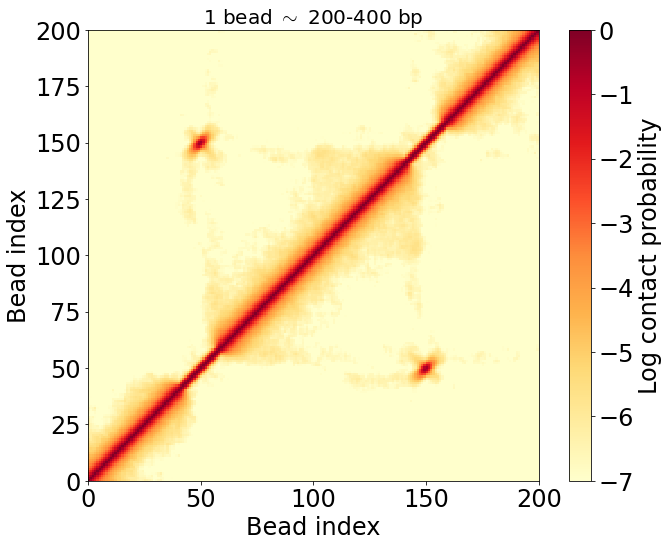

In [54]:
data_path = (ceph_path /"21-08-11_aLchr1_Blooptail200_rigid")
ss_ind = 600
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:520,:,ss_ind:]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1., vmin=-7)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)


#fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

## 21-10-12_aLchr1_sLoop200_steric_rigid

2401


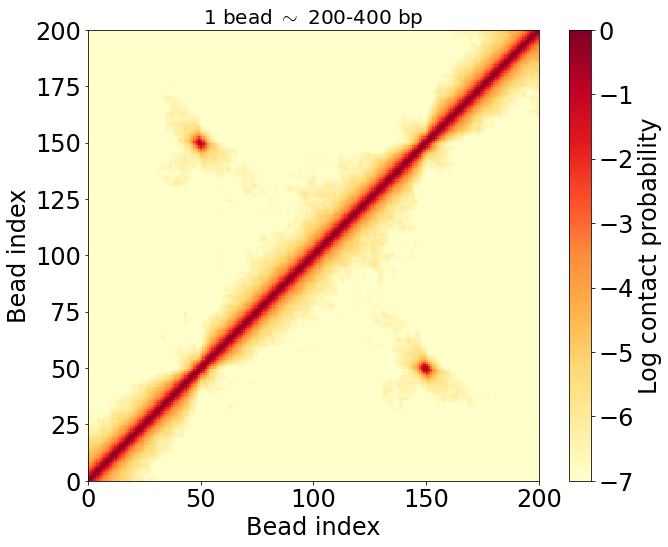

In [53]:
data_path = (ws_path /"21-10-12_aLchr1_sLoop200_steric_rigid")
ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = 200
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    print(time_arr.size)
    sy_dat = h5_data['raw_data']['sylinders'][start_bead:end_bead,:,ss_ind:end_ind]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1., vmin=-7)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)


#fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

## 21-10-12_aLchr1_sLoop200_steric_2xrigid

2401


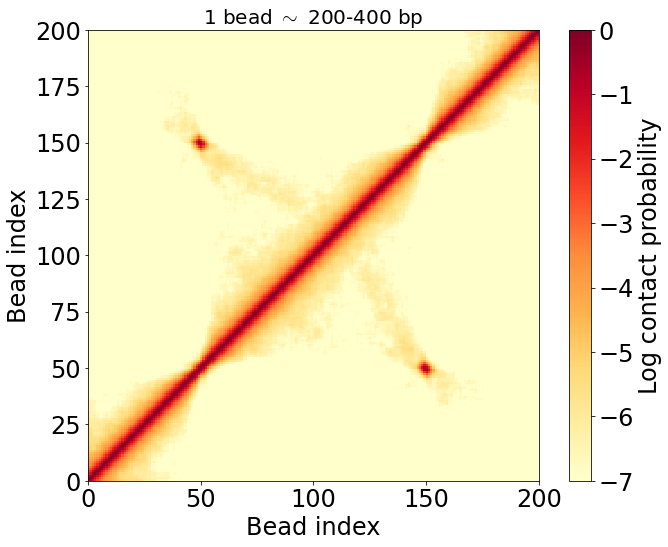

In [55]:
data_path = (ws_path /"21-10-12_aLchr1_sLoop200_steric_2xrigid")
ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = 200
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    print(time_arr.size)
    sy_dat = h5_data['raw_data']['sylinders'][start_bead:end_bead,:,ss_ind:end_ind]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1., vmin=-7)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)


#fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

## 21-10-12_aLchr1_sLoop200_steric_rigid_2xRad

2401


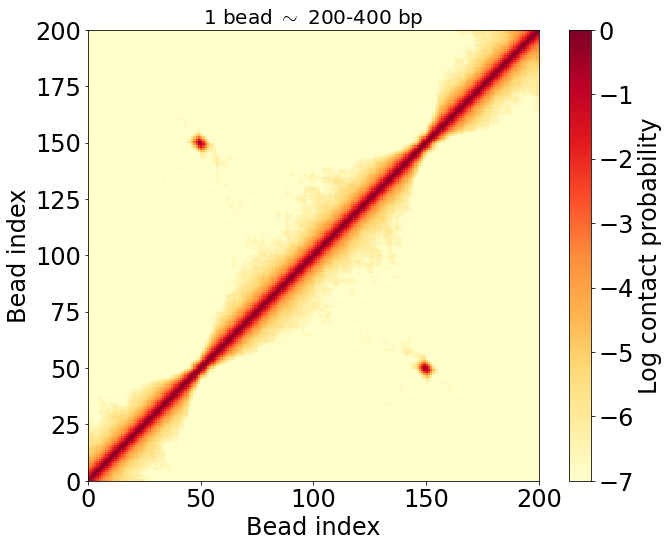

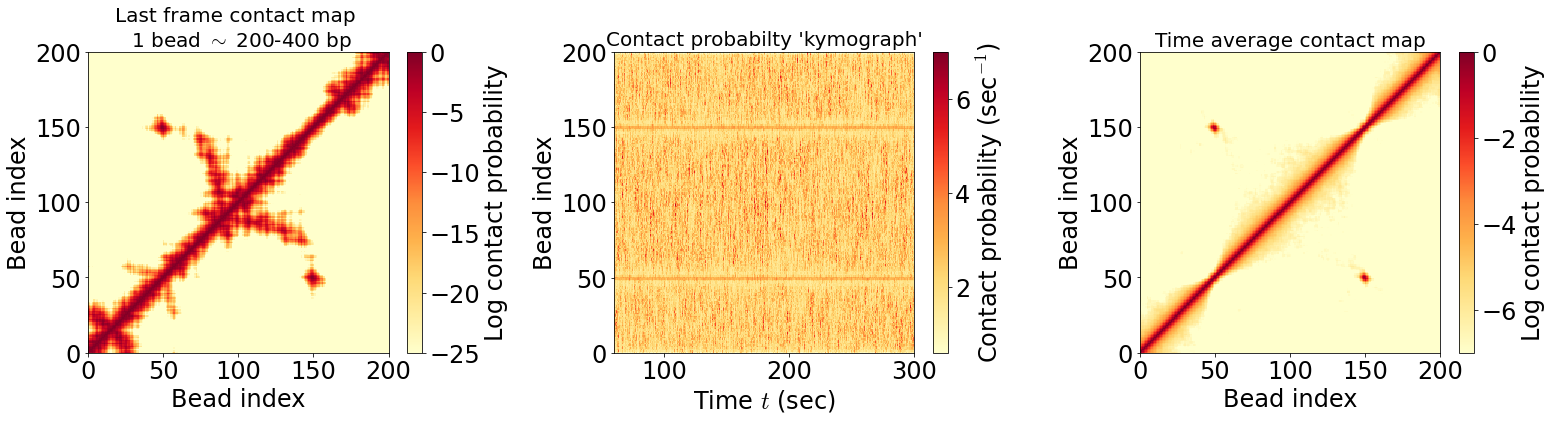

In [106]:
data_path = (ws_path /"21-10-12_aLchr1_sLoop200_steric_rigid_2xRad")
ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = 200
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    print(time_arr.size)
    sy_dat = h5_data['raw_data']['sylinders'][start_bead:end_bead,:,ss_ind:end_ind]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]
    sep_dist_mat = aa.get_sep_dist_mat(h5_data, ss_ind, bead_range=[start_bead,end_bead])


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1., vmin=-7)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)

contact_mat = aa.gauss_weighted_contact(sep_dist_mat)
fig2, axarr2, contact_kymo = aa.make_summed_contact_kymo_graph(contact_mat[:,:,:end_ind], time_arr, vmin=-25, vmax=7, avg_contact_map=log_contact_avg_mat)

## 21-10-29_aLchr1_line200_steric_2xsize40

2401


/mnt/home/alamson/projects/analysis/AMSOS_Analysis/amsos_analysis/chrom_analysis.py:285: RuntimeWarning: divide by zero encountered in log
  


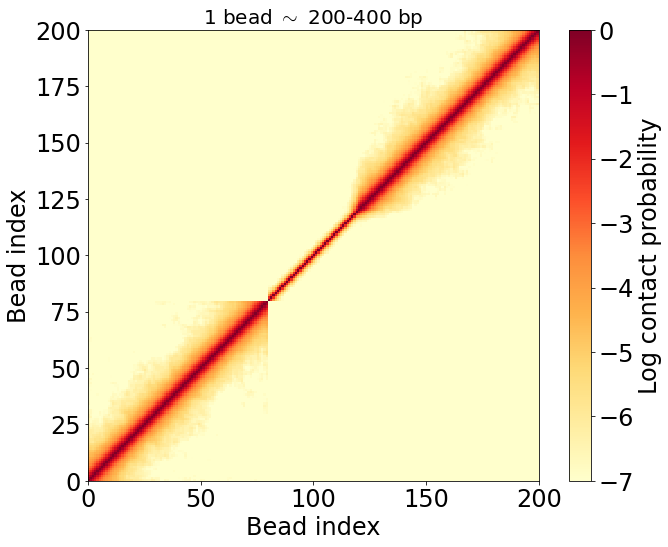

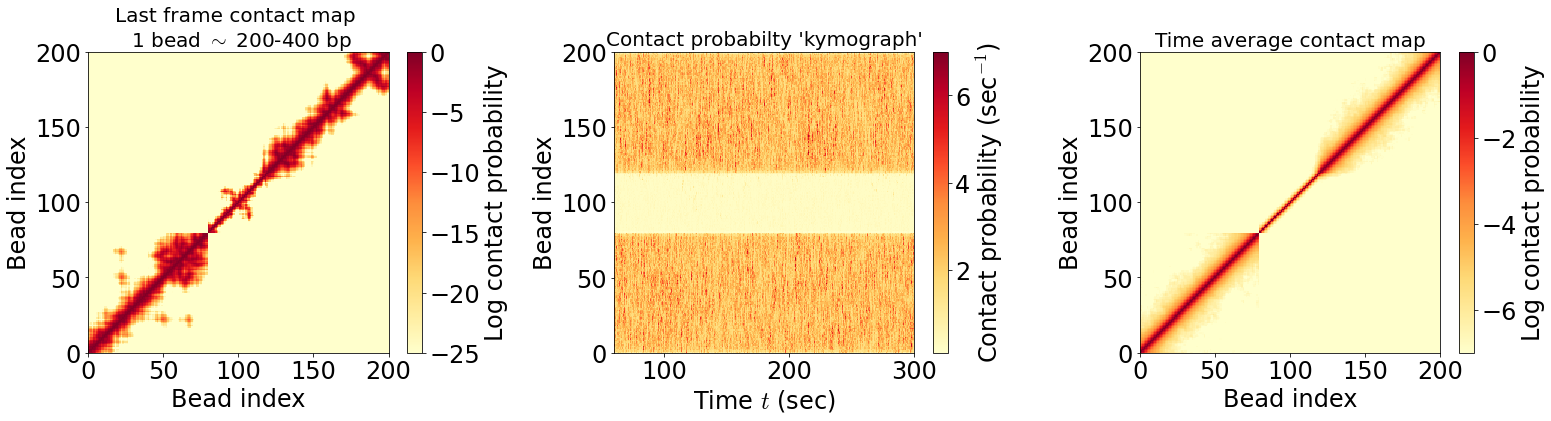

In [104]:
data_path = (ws_path /"21-10-29_aLchr1_line200_steric_2xsize40")
ss_ind = 600
end_ind = -1
start_bead = 0
end_bead = 200
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:end_ind]
    print(time_arr.size)
    sy_dat = h5_data['raw_data']['sylinders'][start_bead:end_bead,:,ss_ind:end_ind]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    nbeads = com_arr.shape[0]
    sep_dist_mat = aa.get_sep_dist_mat(h5_data, ss_ind, bead_range=[start_bead,end_bead])


log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 1)
#mode_mat = get_rouse_modes(com_arr)

# Graphing
#fig0, ax0 = aa.make_segment_distr_graphs(com_arr, [49,150], [49,150], 1,2)
fig1, ax1 = aa.make_hic_plot(com_arr, log_contact_avg_mat, vmin=-7)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=49, hist_max=1., vmin=-7)
#fig2, ax2 = aa.make_rog_vs_time_graph(time_arr, com_arr)

contact_mat = aa.gauss_weighted_contact(sep_dist_mat)
fig2, axarr2, contact_kymo = aa.make_summed_contact_kymo_graph(contact_mat[:,:,:end_ind], time_arr, vmin=-25, vmax=7, avg_contact_map=log_contact_avg_mat)

# Conclusions and Next Steps